In [1]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras

%matplotlib inline

Using TensorFlow backend.
/home/vindeep/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vindeep/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vindeep/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vindeep/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [3]:
from keras import backend as K
def l2_loss(y_pred,y_true):
    return K.sum((K.square(y_true - y_pred)))

In [4]:
import os
os.chdir('/home/vindeep/BE_Project/Noise20_Training/')

In [5]:
import numpy as np
import glob
Y_train = np.zeros((47,3,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("nusta_noise20/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.size == 115200:
        b = b.reshape(3,256,150)
        Y_train[i] = b
        i = i + 1

In [6]:
i

42

In [7]:
Y_train = Y_train[:42,:,:]

In [8]:
Y_train.shape

(42, 3, 256, 150)

In [9]:
import numpy as np
import glob
X_train = np.zeros((47,3,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("image_with_noise20/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.size == 115200:
        b = b.reshape(3,256,150)
        X_train[i] = b
        i = i + 1  

In [10]:
i

42

In [11]:
X_train = X_train[:42,:,:,:]
X_train.shape

(42, 3, 256, 150)

In [12]:
X_train = X_train[:42,:,:,:]
X_train.shape

(42, 3, 256, 150)

In [13]:
import os
os.chdir('/home/vindeep/BE_Project/Noise20_Training/')

In [14]:
from keras.models import load_model
import tensorflow as tf
model = tf.keras.models.load_model('my_model_v2_vindeep.h5', custom_objects={'l2_loss':l2_loss}, compile = False)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 3, 256, 150, 64)   1792      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization (BatchNo (None, 3, 256, 150, 64)   256       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 256, 150, 64)   256       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 3, 256, 150, 64)   2359360   
_________________________________________________________________
batch_normalization_2 (Batch (None, 3, 256, 150, 64)   256       
__________

In [16]:
#PSNR CALCULATION

import numpy as np
from math import log10, sqrt 
import numpy as np 
  
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    #print("mse:",mse)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.Therefore PSNR have no importance. 
                  
        return 100
    psnr_noisy = 20 * log10(255.0 / sqrt(mse)) 
    #print('PSNR of reconstructed validation images: {psnr}dB'.format(psnr=np.round(psnr_noisy,2)))
    return np.round(psnr_noisy,2)

In [17]:
test_img = X_train - Y_train
test_img.shape

(42, 3, 256, 150)

In [18]:
PSNR(test_img[12],X_train[12])

60.89

In [19]:
PSNR(test_img[12],X_train[12])
resi = model.predict(np.array(X_train[12]).reshape(-1,3,256,150,1))
print(resi.shape)
resi = resi.reshape(3,256,150)
PSNR(X_train[12]-resi,X_train[12])

(1, 3, 256, 150, 1)


64.84

In [19]:
Y_train[12] == X_train[12]

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

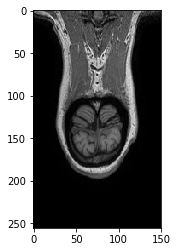

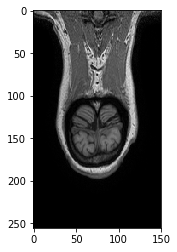

In [20]:
slice_A = X_train[12][1]
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
#plt.savefig('noisy_img(1).png',bbox_inches='tight')
plt.show()

B = X_train[12]-resi
slice_B = B[1]
fig, ax = plt.subplots()
ax.imshow(slice_B, cmap="gray")
#plt.savefig('noise_free(1).png',bbox_inches='tight')
plt.show()


In [21]:
noise_inserted = []
noise_removed = []
nins = 0
nrem = 0
for i in range(30,35):
    nins = PSNR(test_img[i],X_train[i])
    resi = model.predict(np.array(X_train[i]).reshape(-1,3,256,150,1))
    resi = resi.reshape(3,256,150)
    nrem = PSNR(X_train[i]-resi,X_train[i])
    noise_inserted.append(nins) 
    noise_removed.append(nrem)

In [22]:
nins = PSNR(test_img[i],X_train[i])
nins

61.21

In [23]:
noise_inserted

[61.48, 61.12, 61.08, 61.69, 61.21]

In [24]:
noise_removed

[64.64, 64.91, 65.23, 64.55, 66.05]

In [25]:
slice_A = test_img[35:40]

In [26]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [27]:
noise_inserted = []
noise_removed = []
nins = 0
nrem = 0
for i in range(5):
    rr = add_rician_noise_to_img(0.2,slice_A[i])
    nins = PSNR(slice_A[i],rr)
    resi = model.predict(np.array(rr).reshape(-1,3,256,150,1))
    resi = resi.reshape(3,256,150)
    nrem = PSNR(rr-resi,rr)
    noise_inserted.append(nins) 
    noise_removed.append(nrem)

In [28]:
noise_inserted#15 / 20

[59.29, 59.31, 59.42, 57.8, 59.27]

In [29]:
noise_removed#15 / 20

[65.18, 64.41, 65.26, 63.64, 63.78]

In [ ]:
noise_inserted = []
noise_removed = []
nins = 0
nrem = 0
for i in range(5):
    rr = add_rician_noise_to_img(0.1,slice_A[i])
    nins = PSNR(slice_A[i],rr)
    resi = model.predict(np.array(rr).reshape(-1,3,256,150,1))
    resi = resi.reshape(3,256,150)
    nrem = PSNR(rr-resi,rr)
    noise_inserted.append(nins) 
    noise_removed.append(nrem)

In [ ]:
noise_inserted

In [ ]:
noise_removed